# Exploratory Data Analysis on Accidents in UK

![](https://i.imgur.com/V1FZZlK.jpg)

Every year the lives of approximately 1.3 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

**Key facts**

- Approximately 1.3 million people die each year as a result of road traffic crashes.
- The United Nations General Assembly has set an ambitious target of halving the global number of deaths and injuries from road traffic crashes by 2030 (A/RES/74/299)
- Road traffic crashes cost most countries 3% of their gross domestic product.
- More than half of all road traffic deaths are among vulnerable road users: pedestrians, cyclists, and motorcyclists.
- 93% of the world's fatalities on the roads occur in low- and middle-income countries, even though these countries have approximately 60% of the world's vehicles.
- Road traffic injuries are the leading cause of death for children and young adults aged 5-29 years.

[source](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries)


Looking at the dataset we can analyse it to find some useful insights about the accidents that happened


**What is Exploratory Data Analysis(EDA)?**

What is Exploratory Data Analysis?

Exploratory data analysis (EDA for short) is what data analysts do with large sets of data, looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know.

It is an approach to data analysis, that uses these techniques:

- Maximize insights into a dataset.
- Uncover underlying structures.
- Extract important variables.
- Detect outliers and anomalies.
- Test underlying assumptions.
- Determine optimal factor settings.

**Outline of the Project:**

- Import and Install all the libraries.
- Select and download real-world dataset.
- Perform exploratory data analysis & visualization.
- Ask & answer questions about the data.
- Summarizing the insights.

# About the Data

In this analysis we will use the "UK Accidents 10 years history with many variables" by Ben Fedit on [kaggle](https://www.kaggle.com/datasets).

The dataset contains four files:

- Accidents0514.csv : Main data set contains information about accident severity, weather, location, date, hour, day of week, road type and others.

- Vehicle file : contains information about vehicle type, vehicle model, engine size, driver sex, driver age, car age, etc.

- Casualty file: This file provide detailed about the circumstances of an accident from 2005 to 2014 such as casualty age, sex, casualty severity, casualty social class, casualty type and much more…

- Road-Accident-Safety-Data-Guide.xls : The lookup file contain all the information to map the coded variables with their textual strings


Each `.csv` file contains the accident index which maps all the accidents  across all three `.csv` files and and each `.csv` file cantains details of the accidents.


![](https://i.imgur.com/JQDC0Is.png)
![](https://i.imgur.com/aOBnRQ7.png)
![](https://i.imgur.com/mLqJBj1.png)

# Installing and importing all the libraries

- We will use the opendatsets library to download the datset from kaggle.
- The use the `pandas` libary to open the `.csv` file in a dataframe and perform analysis on the data.
- We will use the `matplotlib` and `seaborn` library visualize the data and gets insights from it.

In [2]:
!pip install opendatasets pandas jovian --upgrade --quiet

In [3]:
!pip install folium==0.2.1 --quiet

     |████████████████████████████████| 69 kB 3.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.17.5 requires folium>=0.9.1, but you have folium 0.2.1 which is incompatible.


In [4]:
!pip install matplotlib==3.1.3 --quiet

     |████████████████████████████████| 13.1 MB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.17.5 requires folium>=0.9.1, but you have folium 0.2.1 which is incompatible.


In [5]:
!pip install wordcloud --quiet

In [6]:
#importing the libraries 
import jovian
import opendatasets as od
import numpy as np 
import pandas as pd 
import os 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Downloading the dataset

In [7]:
url = 'https://www.kaggle.com/datasets/benoit72/uk-accidents-10-years-history-with-many-variables'

we will use the `download` funtion of the `opendatsets` library of download the dataset

In [8]:
od.download(url)

100%|██████████| 103M/103M [00:01<00:00, 93.5MB/s]


We can check the downloaded files with the help of `listdir` function of `os` library

In [9]:
os.listdir('uk-accidents-10-years-history-with-many-variables')

['Accidents0514.csv',
 'Vehicles0514.csv',
 'Road-Accident-Safety-Data-Guide.xls',
 'Casualties0514.csv']

Now we need to convert the csv file in a dataframe so that we can work with the dataset, analyse the data and also visualize it. we will use the read_csv function of `pandas`.

In [10]:
accidents_df = pd.read_csv('/content/uk-accidents-10-years-history-with-many-variables/Accidents0514.csv')
casualties_df = pd.read_csv('/content/uk-accidents-10-years-history-with-many-variables/Casualties0514.csv')
vehicle_df = pd.read_csv('/content/uk-accidents-10-years-history-with-many-variables/Vehicles0514.csv')

We will analyse the dataframes one by one as each dataframe contains diffrents aspect of the accidents.

# Exploratory Data Analysis

### Accidents

If we take look in the lookup file we will find that in `Weather_Conditons` and `Road_Surface_Conditions` contains some values that are missing which filled by -1. As we are going to work these columns in our analysis we need to remove the rows which contains -1(missing values).

In [11]:
accidents_df = accidents_df[accidents_df.Weather_Conditions != -1]
accidents_df = accidents_df[accidents_df.Road_Surface_Conditions != -1]

We can check the Non-Null count and Dtype of all the columns with the `info()` function of pandas and the number null values in a column with `isna()` function in conjunction with `sum()` function.

In [12]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638295 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1638295 non-null  object 
 1   Location_Easting_OSGR                        1638185 non-null  float64
 2   Location_Northing_OSGR                       1638185 non-null  float64
 3   Longitude                                    1638185 non-null  float64
 4   Latitude                                     1638185 non-null  float64
 5   Police_Force                                 1638295 non-null  int64  
 6   Accident_Severity                            1638295 non-null  int64  
 7   Number_of_Vehicles                           1638295 non-null  int64  
 8   Number_of_Casualties                         1638295 non-null  int64  
 9   Date                                         1

In [13]:
accidents_df.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                             110
Location_Northing_OSGR                            110
Longitude                                         110
Latitude                                          110
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              129
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

We need to drop the rows which have null values with the help of `dropna()` function 

In [14]:
accidents_df.dropna(inplace = True,  axis = 0)

**Time of accidents**

Working with a sample of the `accidents_df` dataframe.

In [15]:
accidents_time = accidents_df[['Date', 'Day_of_Week', 'Time']]
accidents_time.head()

,Date,Day_of_Week,Time
0,04/01/2005,3,17:42
1,05/01/2005,4,17:36
2,06/01/2005,5,00:15
3,07/01/2005,6,10:35
4,10/01/2005,2,21:13


We can use the date column to extract the date, month and year and making new columns for these entries.

To do that we will create helper functions to extract:

In [16]:
def get_year(string):
  return int(string[6:10])

accidents_time['year'] = accidents_df['Date'].apply(get_year)
accidents_time.head()

,Date,Day_of_Week,Time,year
0,04/01/2005,3,17:42,2005
1,05/01/2005,4,17:36,2005
2,06/01/2005,5,00:15,2005
3,07/01/2005,6,10:35,2005
4,10/01/2005,2,21:13,2005


To pass all the elements of the dataframe column we can use the `.apply()` function which maps all the elements to that function and returns the output

In [17]:
def get_month(string):
  return int(string[3:5])

accidents_time['month'] = accidents_time['Date'].apply(get_month)

def get_day(string):
  return int(string[0:2])

accidents_time['day'] = accidents_time['Date'].apply(get_day)

def get_hour(string):
  return int(string[0:2])

accidents_time['hour'] = accidents_time['Time'].apply(get_hour)

accidents_time.head()

,Date,Day_of_Week,Time,year,month,day,hour
0,04/01/2005,3,17:42,2005,1,4,17
1,05/01/2005,4,17:36,2005,1,5,17
2,06/01/2005,5,00:15,2005,1,6,0
3,07/01/2005,6,10:35,2005,1,7,10
4,10/01/2005,2,21:13,2005,1,10,21


Let's see the number of accidents over the year with simple bar chart

To do that we can use the `value_counts()` and then plot the the graph.

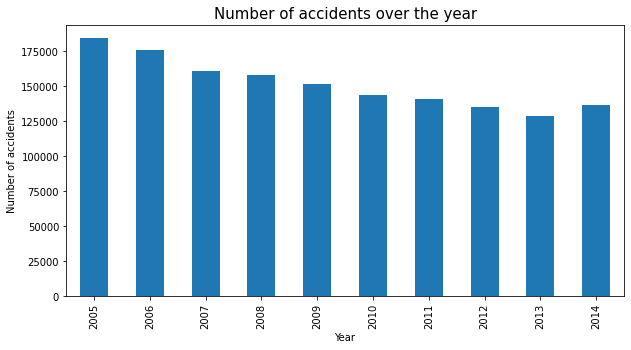

In [18]:
plt.figure(figsize=(10, 5))
accidents_time.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Number of accidents over the year', fontsize = 15);

Let's take a look at the distribution of accidents over the year with a box plot which will also give us the outliers, minimum, maximum, median and quartiles.

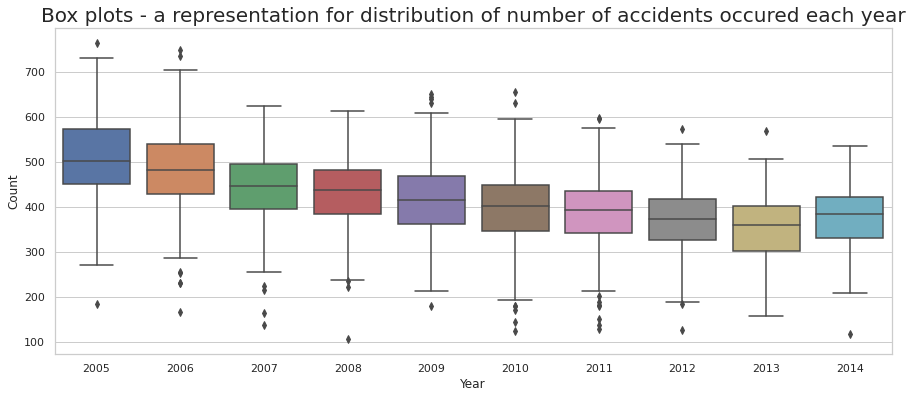

In [19]:
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid")
df_box = []
for i, col in enumerate(accidents_time["year"].unique()):

    acc_per_year = pd.DataFrame(accidents_time["Date"].loc[col == accidents_time["year"]].value_counts().reset_index())
    acc_per_year.columns = ["Date", "Count"]
    acc_per_year["Year"] = col
    df_box.append(acc_per_year)
    
box_data = pd.concat(df_box)
sns.boxplot(x="Year", y="Count", data=box_data)
plt.title("Box plots - a representation for distribution of number of accidents occured each year", fontsize = 20);

**Insight:**

There is a decrease in accidents every year in the decade 2004-2014 except for the last year which get's a spike in number of accidents.

Lets's see what were the prime hours in which accidents happen

In [20]:
hour_df = pd.DataFrame(accidents_time.hour.value_counts())
hour_df.head()

,hour
17,134577
16,122319
15,117097
8,112194
18,105366


**Insights:**

 - Friday is the day of the week in where more accidents tend to happen.
 - The most comon hours of the day in where accidents occur are at 8-9 and 16-17. These are mainly the peak hours to commute to work.

Next we can visualize the accidents in different districts. We need to create a new dataframe using the `value_counts()` functions on the `Local_Authority_(District)` to get the number of accidents in each district. We can also take the top 10 district with most accidents by sorting the columns in descending order and slicing the column to get first 10 values.

In [21]:
district_top_10 = pd.DataFrame(accidents_df['Local_Authority_(District)'].value_counts()).sort_values('Local_Authority_(District)', ascending = False)[:10].reset_index()
district_top_10 = district_top_10.rename(columns={'index': 'city', 'Local_Authority_(District)': 'accidents'})
district_top_10

,city,accidents
0,300,31131
1,204,21609
2,102,15602
3,1,14947
4,200,14684
5,91,13984
6,215,13886
7,601,11844
8,9,11101
9,203,10954


As the district names are in variable code wee need to create a helper function to map the string values to the variable code and using the `apply()` function to map the string.

In [22]:
def get_district(code):
  if code == 300:
    return 'Birmingham'
  elif code == 204:
    return 'Leeds'
  elif code == 102:
    return 'Manchester'
  elif code == 1:
    return 'Westminster'
  elif code == 200:
    return 'Bradford'
  elif code == 91:
    return 'Liverpool'
  elif code == 215:
    return 'Sheffield'
  elif code == 601:
    return 'Bristol'
  elif code == 9:
    return 'Lambeth'
  elif code == 203:
    return 'Kirklees'

In [23]:
district_top_10['city'] = district_top_10['city'].apply(get_district)
district_top_10

,city,accidents
0,Birmingham,31131
1,Leeds,21609
2,Manchester,15602
3,Westminster,14947
4,Bradford,14684
5,Liverpool,13984
6,Sheffield,13886
7,Bristol,11844
8,Lambeth,11101
9,Kirklees,10954


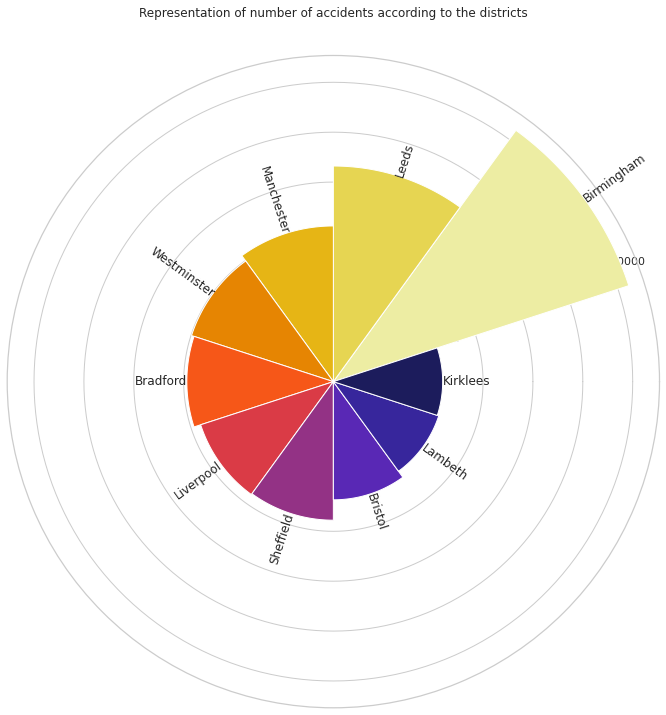

In [24]:
pal = list(sns.color_palette(palette='CMRmap_r', n_colors=len(district_top_10['city'])).as_hex())
lowerLimit = 0
max_v = district_top_10['accidents'].max()

plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()
    
heights = district_top_10['accidents']
width = 2*np.pi / len(district_top_10.index)

indexes = list(range(1, len(district_top_10.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal)
    
labelPadding = 2

for bar, angle, height, label in zip(bars, angles, heights, district_top_10['city']):
    rotation = np.rad2deg(angle)
    alignment = ""
      
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    
    ax.set_thetagrids([], labels=[])
    plt.title('Representation of number of accidents according to the districts')
    ax

**Insights:**

- Birmingham is the distrtict with most number of accidents over 30,000 accidents.

### Casualties

In [25]:
casualties_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


Let's use the `.info()` and `.isna()` on the casualties dataframe to get the info of the columns like the datatype and the the null values.

In [26]:
casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [27]:
casualties_df.isna().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
dtype: int64

As there are no null values in the dataset we can proceed with our analysis.

Let's make a chart for the sex fo the causualty and create a plot for the visualization, but first we need to check for the missing values in the `Sex_Of_Casualty` and remove if any.

In [28]:
casualties_df['Sex_of_Casualty'].value_counts()

 1    1292262
 2     923828
-1        630
Name: Sex_of_Casualty, dtype: int64

In [29]:
casualties_df = casualties_df[casualties_df.Sex_of_Casualty != -1]

As there are variable code which represents the sex of the casualty here we need to create a helper function here to map the sex and returns a string format of sex.

In [30]:
def get_gender(string):
  '''Takes a variable code of sex as an input an returns the appropriate string'''
  if string == 1:
    return 'Male'
  elif string == 2:
    return 'Female'

We will again use the `.apply()` function to use the function on the column.

In [31]:
casualties_df['Sex_of_Casualty'] = casualties_df['Sex_of_Casualty'].apply(get_gender)

Let's create a pie plot visualize the sex of casualty in an accident.

In [103]:
sex_df = pd.DataFrame(casualties_df['Sex_of_Casualty'].value_counts())

vehicle_type_plot = px.pie(sex_df, values='Sex_of_Casualty', names=sex_df.index, hole = 0.3,
                           title='Distribution of accidents with respect to sex of the casualty', color_discrete_sequence=px.colors.qualitative.D3,
                           width = 900, height = 600)
vehicle_type_plot.show()

**Insights:**

- Almost 60% of the casualties are men.

Next, let's visualize the age of casualties.

As the entire dataframe is written with variable code therefore we need to create a hepler again here to map the age or in this case the age band of the casualties.

In [33]:
def get_age_band(age):
  if age == 1:
    return '0-5'
  elif age == 2:
    return '6-10'
  elif age == 3:
    return '11-15'
  elif age == 4:
    return '16-20'
  elif age == 5:
    return '21-25'
  elif age == 6:
    return '26-35'
  elif age == 7:
    return '36-45'
  elif age == 8:
    return '46-55'
  elif age == 9:
    return '56-65'
  elif age == 10:
    return '66-75'
  elif age == 1:
    return 'over 75'
  elif age == -1:
    return "Don't Know"

In [34]:
casualties_df['Age_Band_of_Casualty'] = casualties_df['Age_Band_of_Casualty'].apply(get_age_band)

Let's use a count plot to visulize the age band of the casualties

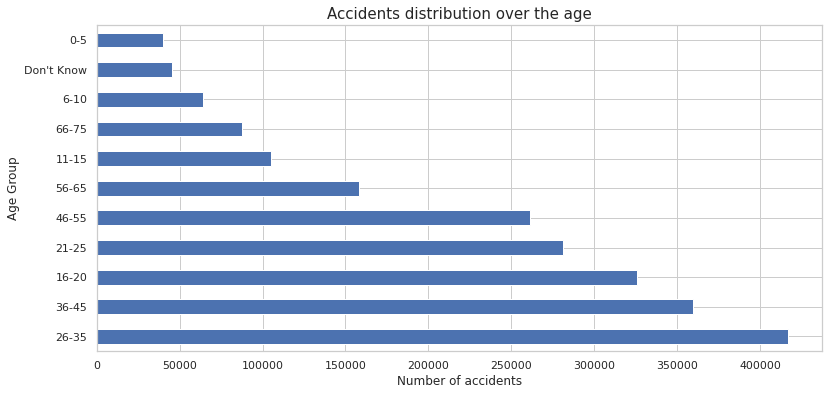

In [35]:
plt.figure(figsize=(13, 6))
casualties_df['Age_Band_of_Casualty'].value_counts().plot(kind='barh')
plt.ylabel('Age Group')
plt.xlabel('Number of accidents')
plt.title('Accidents distribution over the age', fontsize=15);

**Insights:**

- More that one third of the casulaty lies between the age band of 26-45.

Next, let's take a look at the distribution of the accidents based on the severity. Let's check the values in the 'Casualty_Severity' column and create a helper function to map he variable code in the column with the text string.

In [36]:
casualties_df['Casualty_Severity'].value_counts()

3    1943641
2     249378
1      23071
Name: Casualty_Severity, dtype: int64

In [37]:
def get_casualty(code):
  if code == 1:
    return 'Fatal'
  elif code == 2:
    return 'Serious'
  elif code == 3:
    return 'Slight'

In [38]:
casualties_df['Casualty_Severity'] = casualties_df['Casualty_Severity'].apply(get_casualty)
casualties_df['Casualty_Severity']

0          Serious
1           Slight
2           Slight
3           Slight
4           Slight
            ...   
2216715     Slight
2216716     Slight
2216717    Serious
2216718     Slight
2216719     Slight
Name: Casualty_Severity, Length: 2216090, dtype: object

In [39]:
pd.DataFrame(casualties_df['Casualty_Severity'].value_counts()).reset_index()

,index,Casualty_Severity
0,Slight,1943641
1,Serious,249378
2,Fatal,23071


We can see that around 87% of the accidents have the severity of 'Slight'

We can also plot the accidents based on the external conditions like the 'Weather Conditions', 'Light Conditions' and the 'Road Surface Conditions'.


Lets start by creating a sample dataframe with 'Weather Conditions', 'Light Conditions' and the 'Road Surface Conditions' columns.

In [40]:
conditions_df = accidents_df[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]
conditions_df['Severity'] = casualties_df['Casualty_Severity']
conditions_df

,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Severity
0,1,2,2,Serious
1,4,1,1,Slight
2,4,1,1,Slight
3,1,1,1,Slight
4,7,1,2,Slight
...,...,...,...,...
1631803,6,2,2,Slight
1631804,6,1,1,Slight
1631805,6,2,2,Slight
1631806,4,9,2,Serious


As we can see that the columns in the `conditions_df` all have variable code, therefore we need to create helper functions to map the text string to all the columns.


We will create a helper functions for each columns to map the the codes:

In [41]:
def get_light(condition):
  if condition == 1:
    return 'Daylight'
  elif condition == 4:
    return 'Darkness - lights lit'
  elif condition == 5:
    return 'Darkness - lights unlit'
  elif condition == 6:
    return 'Darkness - no lighting'
  elif condition == 7:
    return 'Darkness - lighting unknown'

In [42]:
def get_weather(condition):
  if condition == 1:
    return 'Fine no high winds'
  elif condition == 2:
    return 'Raining no high winds'
  elif condition == 3:
    return 'Snowing no high winds'
  elif condition == 4:
    return 'Fine + high winds'
  elif condition == 5:
    return 'Raining + high winds'
  elif condition == 6:
    return 'Snowing + high winds'
  elif condition == 7:
    return 'Fog or mist'
  elif condition == 8:
    return 'Other'
  elif condition == 9:
    return 'Unknown'

In [43]:
def get_road(condition):
  if condition == 1:
    return 'Dry'
  elif condition == 2:
    return 'Wet or Damp'
  elif condition == 3:
    return 'Snow'
  elif condition == 4:
    return 'Frost or Ice'
  elif condition == 5:
    return 'Flood over 3cm. deep'
  elif condition == 6:
    return 'Oil or Disel'
  elif condition == 7:
    return 'Mud'

In [44]:
conditions_df['Light_Conditions'] = conditions_df['Light_Conditions'].apply(get_light)
conditions_df['Weather_Conditions'] = conditions_df['Weather_Conditions'].apply(get_weather)
conditions_df['Road_Surface_Conditions'] = conditions_df['Road_Surface_Conditions'].apply(get_road)

Let's create a heatmap to the severity of accidents with light conditions but before we can do that we need to create a pivot table with `Light_Conditions` and `Severity`. We can achieve this with the help of `groupby` function and then using pivot function of pandas to make a pivot table.

In [45]:
conditions = conditions_df.groupby(['Light_Conditions', 'Severity']).size().reset_index().pivot(columns='Severity', index='Light_Conditions', values=0)

In [46]:
conditions

Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,191,1832,14637
Darkness - lights lit,3318,33248,263687
Darkness - lights unlit,48,749,5787
Darkness - no lighting,900,9058,71493
Daylight,12010,123694,976506


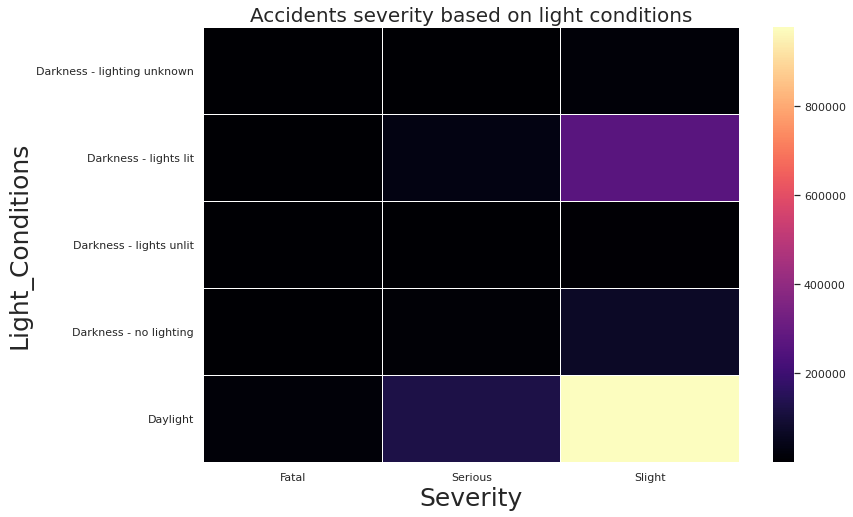

In [47]:
plt.figure(figsize = (12, 8))
sns.set(rc={"axes.labelsize":25})
sns.heatmap(conditions, linewidths = 0.2, cmap='magma')
plt.title('Accidents severity based on light conditions', fontsize = 20)
plt.show()

**Insights:**

- The accidents in daylight are more than the accidents that happened in darkness and also the accidents that happened in the darkness with the lights on are more

We can also visulaize the accidents base on the road surface conditions.


In [48]:
road_plot = px.histogram(conditions_df, x="Road_Surface_Conditions", histnorm='percent', barmode='group', width = 1000, height = 600, labels={
                     "Road_Surface_Conditions": "Road Surface Conditions",
                     "percent": "Percentage"
                 }, title = 'Accidents based on road surface conditions')
road_plot.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- Almost 70% accidents happens with the roads dry and almost one third of the accidents happens with the road surface wet.

Next let's create a visualtion of accidents based on weather conditions. We will use a tree map to visualize the weather conditions

Before we visualize, we will create a dataframe with count of accidents which happened under each weather conditons the `value_counts()` function of pandas will help us achieve that.

In [49]:
weather_dict = {
              'Year': conditions_df.Weather_Conditions.value_counts().index,
              'Count': conditions_df.Weather_Conditions.value_counts().values
            }
weather_df = pd.DataFrame(weather_dict)
weather_df['percentage'] = (weather_df['Count'] / weather_df['Count'].sum()) * 100

In [50]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
weather_plot = px.treemap(weather_df, path=['Year'],values='percentage', color_continuous_scale='balance', width=1000, height=600)
weather_plot.update_layout(
    treemapcolorway = colors, title = 'Accidents based on weather conditions',
    title_font_family="Times New Roman",
    font=dict(
        family="Courier New, monospace",
        size=18,))
weather_plot.show();

**Insights:**

- It is evident that almost 80% of the accidents happened when the weather as normal with no high winds.

### Vehicles

Moving on to the vehicle data, let's check the `vehicle_df` to get an idea about the data in the file

In [51]:
vehicle_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [52]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Accident_Index                    object
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      int64 
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     int64 
 15  Age_of_Driver                     int64 
 16  Age_Band_of_Driver                int64 
 17  Engine_C

In [53]:
vehicle_df.isna().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

As we can see that all of the column data is of int type just like the previous files therefore we will need create some helper functions to map the string data in our dataframe to do the analysis.

Also there are no null values in the dataframe therefore we can move on with our anaalysis part of the dataframe.

Let's analyse the `1st_Point_of_Impact` column to analyse the point of impact of the vehicles in an accident

In [54]:
vehicle_df['1st_Point_of_Impact'].value_counts()

 1    1473974
 2     540024
 3     419579
 4     372821
 0     197462
-1        565
Name: 1st_Point_of_Impact, dtype: int64

If we look in our guide file, the '-1' represets the data missing data therefore we can remove the rows which contain '-1' in them

In [55]:
vehicle_df = vehicle_df[vehicle_df['1st_Point_of_Impact'] != -1]

As before we will create a helper function to map the variable code to the string data

In [56]:
def get_point_of_impact(impact):
  if impact == 0:
    return 'Did not Imapct'
  elif impact == 1:
    return 'Front'
  elif impact == 2:
    return 'Back'
  elif impact == 3:
    return 'Offside'
  elif impact == 4:
    return 'Nearside'

In [57]:
vehicle_df['1st_Point_of_Impact'] = vehicle_df['1st_Point_of_Impact'].apply(get_point_of_impact)

Now that we have our column clean and mapped we can plot the column to visulaise it.

In [58]:
plt.figure(figsize = (13, 6))
impact_plot = px.histogram(vehicle_df, x="1st_Point_of_Impact", histnorm='percent', width=1000, height=600, labels={
                     "1st_Point_of_Impact": "Point of Impact",
                     "percent": "Percentage"
                 }, title = 'Point of Impact when the accidents happened')
impact_plot.show()

Output hidden; open in https://colab.research.google.com to view.

**Insights:**

- The first point of impact is the front in the 50% of the vehicles implicated on accidents.

We can also determine the vehicle type in which most accidents happens.

We will use the `Vehicle_Type` column but as before this column is also in variable code therefore we will create a helper function to map the text string.
There are also some missing data which is represented by -1 and we need remove the rows which contain missing data.

In [59]:
vehicle_df = vehicle_df[vehicle_df['Vehicle_Type'] != -1]

In [60]:
def get_vehicle(v_type):
  if v_type == 1:
    return 'Pedal Cycle'
  elif v_type == 2 or v_type == 3 or v_type == 4 or v_type == 5 or v_type == 97:
    return 'Motorcycle'
  elif v_type == 8:
    return 'Taxi/Private hire car'
  elif v_type == 9:
    return 'car'
  elif v_type == 10:
    return 'Minibus (8 - 16 passenger seats)'
  elif v_type == 11:
    return 'Bus or coach (17 or more pass seats)'
  elif v_type == 16:
    return 'Ridden horse'
  elif v_type == 17:
    return 'Agricultural vehicle'
  elif v_type == 18:
    return 'Tram'
  elif v_type == 19:
    return 'Van / Goods 3.5 tonnes mgw or under'
  elif v_type == 20:
    return 'Goods over 3.5t. and under 7.5t'
  elif v_type == 21:
    return 'Goods 7.5 tonnes mgw and over'
  elif v_type == 22:
    return 'Mobility scooter'
  elif v_type == 23:
    return 'Electric motorcycle'
  elif v_type == 90:
    return 'Other vehicle'

In [61]:
vehicle_df['Vehicle_Type'] = vehicle_df['Vehicle_Type'].apply(get_vehicle)

As there are fifteen vehicle type therefore we will work with the top 5 vehicles in which accidents happen.

In [62]:
vehicle_type = pd.DataFrame(vehicle_df['Vehicle_Type'].value_counts())

In [63]:
vehicle_type_plot = px.pie(vehicle_type, values='Vehicle_Type', names=vehicle_type.index, hole = 0.3,
                           title='Vehicle with most accidents', color_discrete_sequence=px.colors.qualitative.D3,
                           width = 900, height = 600)
vehicle_type_plot.show()

**Insight:**

- Almost 65% of the accidents happens when the mode of travel is car

Let's plt the Manoeuvre of the vehicle before the accident happens, but we need a helper here also to map the actual data.

In [64]:
def get_manoeuvre(code):
  if code == 1:
    return 'Reversing'
  elif code == 2:
    return 'Parked'
  elif code == 3:
    return 'Waiting to go - held up'
  elif code == 4:
    return 'Slowing or stopping'
  elif code == 5:
    return 'Moving off'
  elif code == 6:
    return 'U-turn'
  elif code == 7:
    return 'Turning left'
  elif code == 8:
    return 'Waiting to turn left'
  elif code == 9:
    return 'Turning right'
  elif code == 10:
    return 'Waiting to turn right'
  elif code == 1:
    return 'Changing lane to left'
  elif code == 12:
    return 'Changing lane to right'
  elif code == 13:
    return 'Overtaking moving vehicle - offside'
  elif code == 14:
    return 'Overtaking static vehicle - offside'
  elif code == 15:
    return 'Overtaking - nearside'
  elif code == 16:
    return 'Going ahead left-hand bend'
  elif code == 17:
    return 'Going ahead right-hand bend'
  elif code == 18:
    return 'Going ahead other'
  elif code == -1:
    return 'Data missing'


def get_hit_object_in(code):
  if code == 0:
    return 'None'
  elif code == 1:
    return 'Previous accident'
  elif code == 2:
    return 'Road works'
  elif code == 4:
    return 'Parked vehicle'
  elif code == 5:
    return 'Bridge (roof)'
  elif code == 6:
    return 'Bridge (side)'
  elif code == 7:
    return 'Bollard or refuge'
  elif code == 8:
    return 'Open door of vehicle'
  elif code == 9:
    return 'Central island of roundabout'
  elif code == 10:
    return 'Kerb'
  elif code == 11:
    return 'Other object'
  elif code == 12:
    return 'Any animal (except ridden horse)'
  elif code == -1:
    return 'Data missing'


def get_hit_object_off(code):
  if code == 0:
    return 'None'
  elif code == 1:
    return 'Road sign or traffic signal'
  elif code == 2:
    return 'Lamp post'
  elif code == 3:
    return 'Telegraph or electricity pole '
  elif code == 4:
    return 'Tree'
  elif code == 5:
    return 'Bus stop or bus shelter'
  elif code == 6:
    return 'Central crash barrier'
  elif code == 7:
    return 'Near/Offside crash barrier'
  elif code == 8:
    return 'Submerged in water'
  elif code == 9:
    return 'Entered ditch'
  elif code == 10:
    return 'Other permanent object'
  elif code == 11:
    return 'Wall or fence'
  elif code == -1:
    return 'Data missing'


In [65]:
vehicle_df['Vehicle_Manoeuvre'] = vehicle_df['Vehicle_Manoeuvre'].apply(get_manoeuvre)
vehicle_df['Hit_Object_in_Carriageway'] = vehicle_df['Hit_Object_in_Carriageway'].apply(get_hit_object_in)
vehicle_df['Hit_Object_off_Carriageway'] = vehicle_df['Hit_Object_off_Carriageway'].apply(get_hit_object_off)

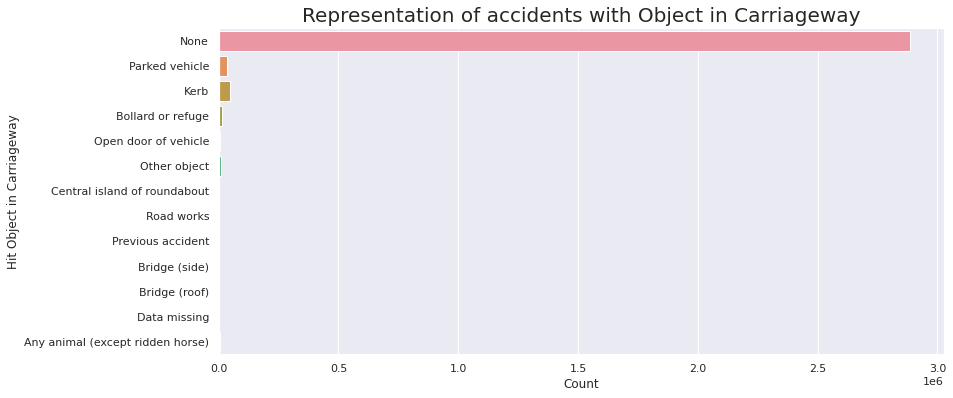

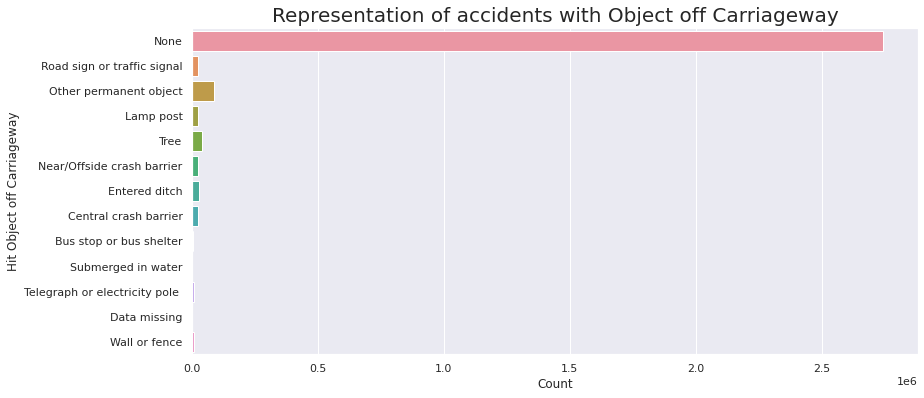

In [66]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
impact_plot = sns.countplot(y = 'Hit_Object_in_Carriageway', data = vehicle_df)
impact_plot.set(xlabel = 'Count', ylabel = 'Hit Object in Carriageway')
plt.title('Representation of accidents with Object in Carriageway', fontsize = 20)
plt.show()


plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
impact_plot = sns.countplot(y = 'Hit_Object_off_Carriageway', data = vehicle_df)
impact_plot.set(xlabel = 'Count', ylabel = 'Hit Object off Carriageway')
plt.title('Representation of accidents with Object off Carriageway', fontsize = 20)
plt.show()

**Insights:**

- We can see that there are no other objects that are prominent for the cause of accidents.

Next let's see the junction locations of the accidents.

In [67]:
def get_junction(code):
  if code == 0:
    return 'Not at or within 20 metres of junction'
  elif code == 1:
    return 'Approaching junction or waiting/parked at junction approach'
  elif code == 2:
    return 'Cleared junction or waiting/parked at junction exit'
  elif code == 3:
    return 'Leaving roundabout'
  elif code == 4:
    return 'Entering roundabout'
  elif code == 5:
    return 'Leaving main road'
  elif code == 6:
    return 'Entering main road'
  elif code == 7:
    return 'Entering from slip road'
  elif code == 8:
    return 'Mid Junction - on roundabout or on main road'
  elif code == -1:
    return 'Data missing'

In [68]:
vehicle_df['Junction_Location'] = vehicle_df['Junction_Location'].apply(get_junction)

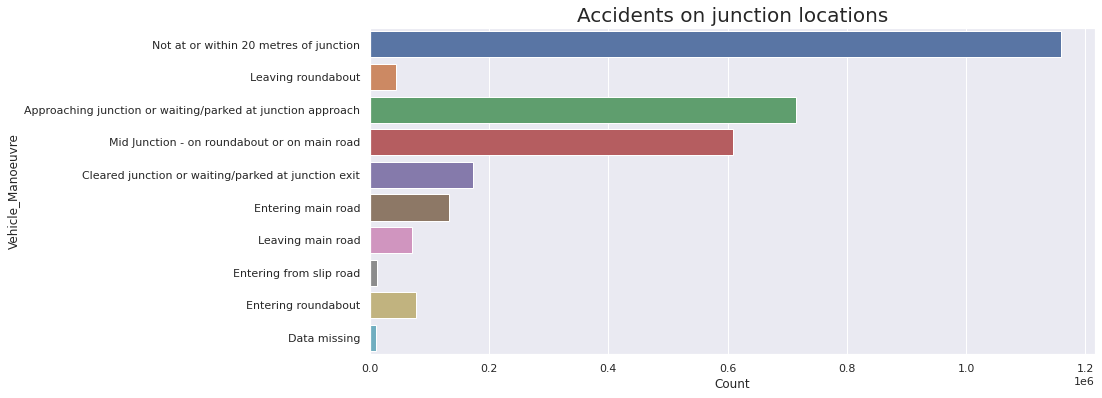

In [69]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
impact_plot = sns.countplot(y = 'Junction_Location', data = vehicle_df)
impact_plot.set(xlabel = 'Count', ylabel = 'Vehicle_Manoeuvre')
plt.title('Accidents on junction locations', fontsize = 20)
plt.show()

# Questions & Answer

### **Q1: What was the the trend of accidents in UK over the year?**

- There was a decrease in accidents every year in the decade 2004-2014 except for the last year which get's a spike in number of accidents.

In [70]:
severity_df = pd.DataFrame(casualties_df['Casualty_Severity'])
severity_df['year'] = accidents_time['year']
severity_df.head()

,Casualty_Severity,year
0,Serious,2005.0
1,Slight,2005.0
2,Slight,2005.0
3,Slight,2005.0
4,Slight,2005.0


In [71]:
slight_df = severity_df[severity_df['Casualty_Severity'] == 'Slight'].year.value_counts().sort_index().reset_index()
slight_df.columns = ["Year", "Number of accidents"]
serious_df = severity_df[severity_df['Casualty_Severity'] == 'Serious'].year.value_counts().sort_index().reset_index()
serious_df.columns = ["Year", "Number of accidents"]
fatal_df = severity_df[severity_df['Casualty_Severity'] == 'Fatal'].year.value_counts().sort_index().reset_index()
fatal_df.columns = ["Year", "Number of accidents"]

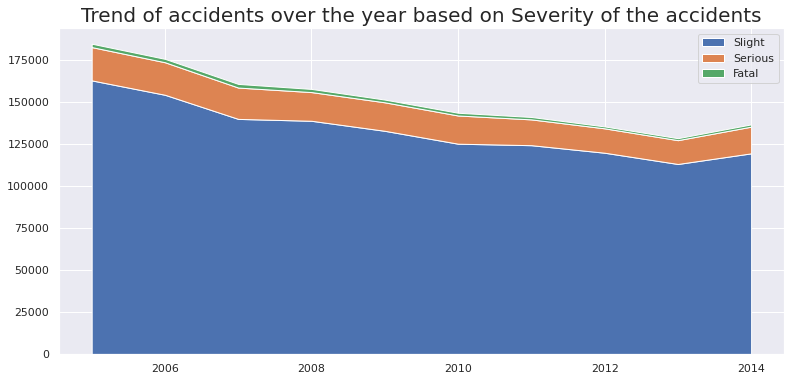

In [72]:
plt.figure(figsize=(13, 6))

plt.stackplot(slight_df.Year, slight_df['Number of accidents'], serious_df['Number of accidents'], fatal_df['Number of accidents'], labels=['Slight','Serious','Fatal'])
plt.legend(loc='upper right')
plt.title("Trend of accidents over the year based on Severity of the accidents", fontsize = 20);

In [73]:
accidents_time['Ones']=1
table = pd.pivot_table(accidents_time, values='Ones', index=['month'],columns=['year'], aggfunc=np.sum)
table

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,
1,15148,13879,13639,13035,12440,9902,10933,10997,9402,11279
2,13495,13025,11643,13297,10120,10882,10386,10095,8915,10055
3,13921,13816,13288,12381,12221,12301,11621,11385,9520,11160
4,14652,12873,12468,12515,11817,11475,11600,10107,9251,10259
5,15879,14978,13941,13316,12810,12324,11780,11535,10583,11533
6,15729,14969,13745,13199,12917,12776,12233,10644,10967,11760
7,15799,15595,14062,13649,13238,12610,12297,12057,12125,12184
8,15177,14154,13147,12208,12298,12041,11145,11001,10849,11247
9,15556,15510,13530,13429,12801,12925,12358,12169,11184,11094


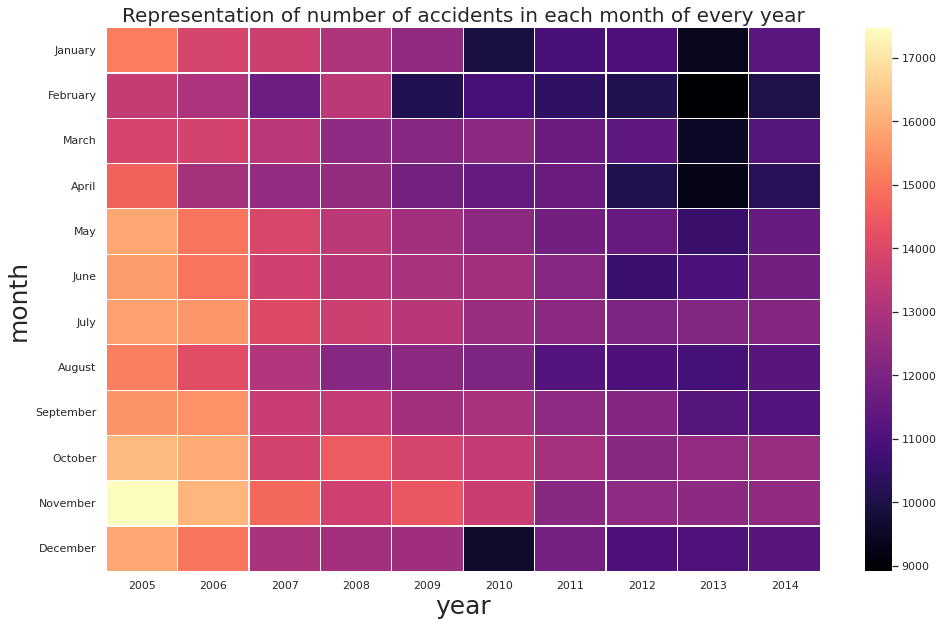

In [74]:
plt.figure(figsize = (16, 10))
yticks = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(rc={"axes.labelsize":25})
sns.heatmap(table, yticklabels=yticks, linewidths = 0.2, cmap='magma')
plt.title("Representation of number of accidents in each month of every year", fontsize = 20)
plt.show()

**Insights:**

- There is a sudden decrease in accidents in the month of january to april in the year 2013 because A snowy spell of weather affected most the UK in January 2013. This period brought the most widespread and prolonged snowfall in the UK since November and December 2010 which also sees a sudden decrease in accidents and led to travel disruption and school closures across many parts of the country.
- January 2010 was provisionally the coldest January since 1987 in the UK which explains the sudden decrease in the accidents.

### **Q2: What was the most common time for the accidents to happen?**

The most common hours of the day in where accidents occur are at 8-9 and 16-17 as we have seen above. These are mainly the peak hours to commute to work. Let's take a look at things from a different perspective.

We will take a look a the purpose of the journey when the accidents happened.

In [76]:
vehicle_df = vehicle_df[(vehicle_df['Journey_Purpose_of_Driver'] != 15) & (vehicle_df['Journey_Purpose_of_Driver'] != -1)]

In [77]:
def get_journey_type(variable):
  if variable == 1:
    return 'Journey as part of work'
  elif variable == 2:
    return 'Commuting to/from work'
  elif variable == 3:
    return 'Taking pupil to/from school'
  elif variable == 4:
    return 'Pupil riding to/from school'
  elif variable == 5:
    return 'other'
  elif variable == 6:
    return 'Not Known'

In [78]:
vehicle_df['Journey_Purpose_of_Driver'] = vehicle_df['Journey_Purpose_of_Driver'].apply(get_journey_type)

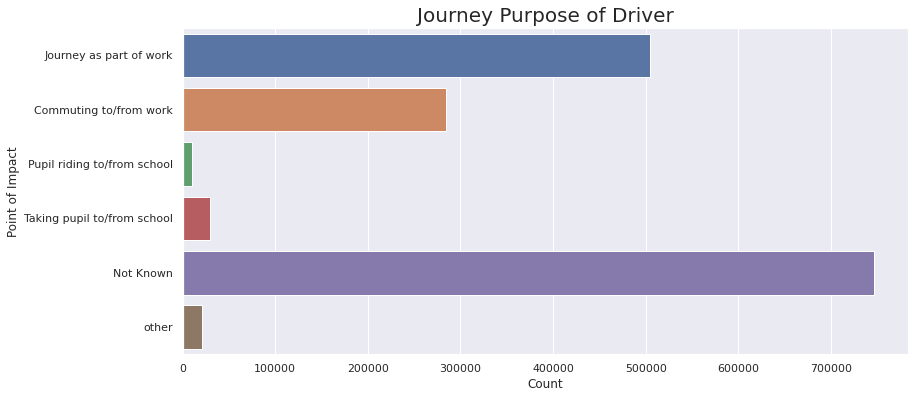

In [79]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
impact_plot = sns.countplot(y = 'Journey_Purpose_of_Driver', data = vehicle_df)
impact_plot.set(xlabel = 'Count', ylabel = 'Point of Impact')
plt.title('Journey Purpose of Driver', fontsize = 20)
plt.show()

With the above plot we can see that most number of accidents happens while people commuting to the work which happens to be around the 17th hour, Where the accidents are the highest.

### **Q3: Which people are the most affected in the accidents?**

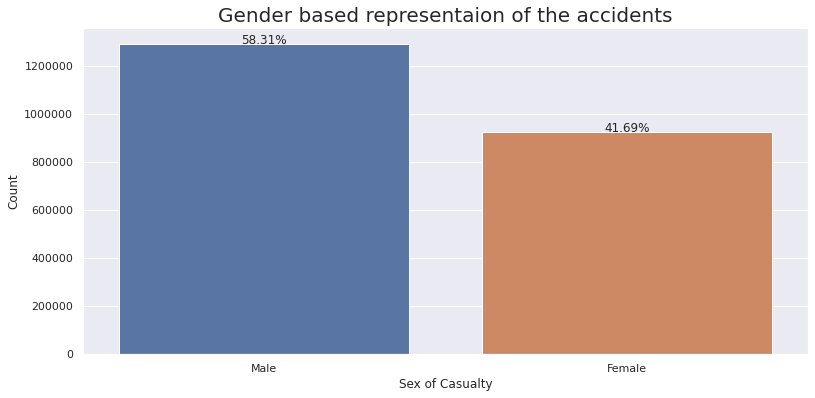

In [80]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
gender_plot = sns.countplot(x = 'Sex_of_Casualty', data = casualties_df)
gender_plot.set(xlabel = 'Sex of Casualty', ylabel = 'Count')
plt.ticklabel_format(style='plain', axis='y')
for p in gender_plot.patches:
    height = p.get_height() 
    gender_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(casualties_df))*100)+'%',  
      ha="center") 
plt.title('Gender based representaion of the accidents', fontsize = 20)
plt.show()

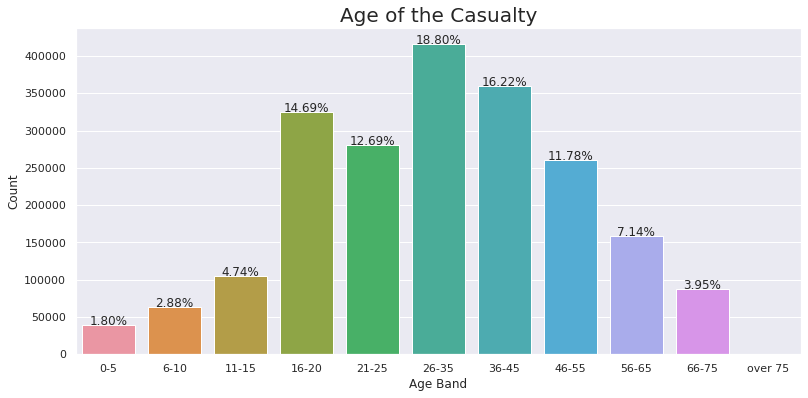

In [81]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
ageBand_plot = sns.countplot(x = 'Age_Band_of_Casualty', data = casualties_df, order=['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75'])
ageBand_plot.set(xlabel = 'Age Band', ylabel = 'Count')
for p in ageBand_plot.patches:
    height = p.get_height() 
    ageBand_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(casualties_df))*100)+'%',  
      ha="center") 
plt.title('Age of the Casualty', fontsize = 20)
plt.show();

In [82]:
def get_casualty_type(c_type):
  if c_type == 0:
    return 'Pedestrian'
  elif c_type == 1:
    return 'Cyclist'
  elif c_type == 2 or c_type == 3 or c_type == 4 or c_type == 5 or c_type == 97:
    return 'Motorcycle'
  elif c_type == 8:
    return 'Taxi/Private hire car occupant'
  elif c_type == 9:
    return 'Car occupant'
  elif c_type == 10:
    return 'Minibus (8 - 16 passenger seats) occupant'
  elif c_type == 11:
    return 'Bus or coach occupant (17 or more pass seats)'
  elif c_type == 16:
    return 'Horse rider'
  elif c_type == 17:
    return 'Agricultural vehicle occupant'
  elif c_type == 18:
    return 'Tram occupant'
  elif c_type == 19:
    return 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant'
  elif c_type == 20 or c_type == 21 or c_type == 98:
    return 'Goods vehicle'
  elif c_type == 22:
    return 'Mobility scooter rider'
  elif c_type == 23:
    return 'Electric motorcycle rider or passenger'
  elif c_type == 90:
    return 'Other vehicle occupant'

In [83]:
casualties_df['Casualty_Type'] = casualties_df['Casualty_Type'].apply(get_casualty_type)

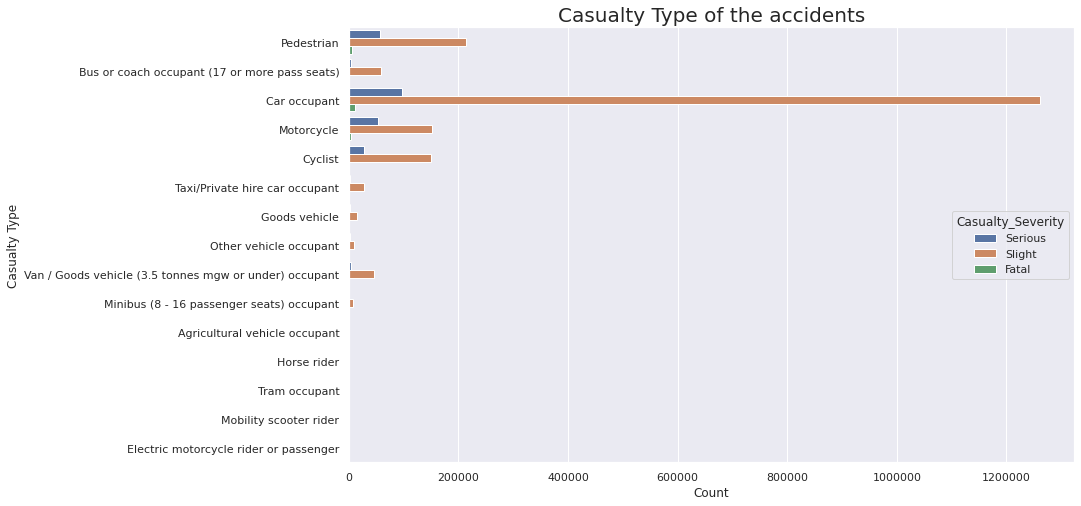

In [84]:
plt.figure(figsize = (13, 8))
sns.set(style='darkgrid')
gender_plot = sns.countplot(y = 'Casualty_Type',hue = 'Casualty_Severity', data = casualties_df)
gender_plot.set(xlabel = 'Count', ylabel = 'Casualty Type')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Casualty Type of the accidents', fontsize = 20)
plt.show()

- Almost 60% of the casualties are men and more than one third of the casualties are in the age band 25-45.
- about 70% of the accidents that heppened involved a car occupant as casualties.


### **Q4: How many accidents were serious out of all the accidents that happened?**

Around 10% of the accidents were serious and just 1% of accidents happened to be fatal.

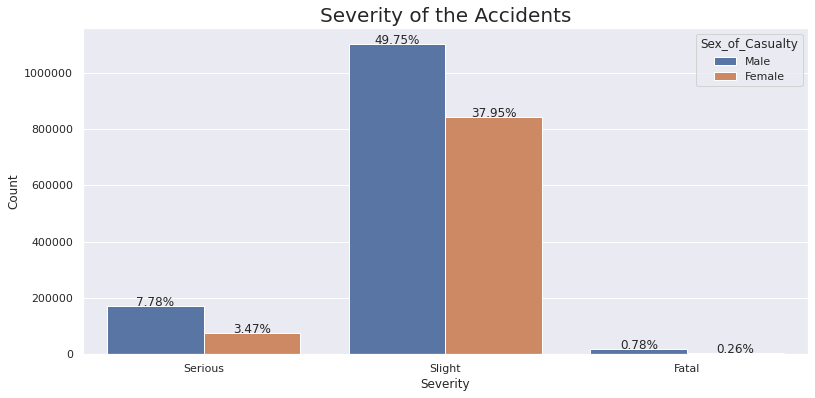

In [85]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
severity_plot = sns.countplot(x = 'Casualty_Severity', hue = 'Sex_of_Casualty', data = casualties_df)
severity_plot.set(xlabel = 'Severity', ylabel = 'Count')
plt.ticklabel_format(style='plain', axis='y')
for p in severity_plot.patches:
    height = p.get_height() 
    severity_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(casualties_df))*100)+'%',  
      ha="center")
plt.title('Severity of the Accidents', fontsize = 20)
plt.show()

We can also visualize the accidents based on the severity across the years. As the year and casulaty_severity columns are in different dataframes therefore we will create a new dataframe with columns from accidents_time and casualty_df.

In [86]:
severity_df = pd.DataFrame(casualties_df['Casualty_Severity'])
severity_df['year'] = accidents_time['year']
severity_df.head()

,Casualty_Severity,year
0,Serious,2005.0
1,Slight,2005.0
2,Slight,2005.0
3,Slight,2005.0
4,Slight,2005.0


Now we need to count all the accidents in all the years based on the severity. We can use the groupby function to do this.

In [87]:
conditions = severity_df.groupby(['year', 'Casualty_Severity']).size().reset_index().pivot(columns='Casualty_Severity', index='year', values=0)
conditions

Casualty_Severity,Fatal,Serious,Slight
year,,,
2005.0,2026,19817,163019
2006.0,2025,19365,154438
2007.0,2180,18645,140091
2008.0,1876,17079,138968
2009.0,1625,16957,133002
2010.0,1624,16791,125329
2011.0,1441,15352,124447
2012.0,1134,14519,119959
2013.0,1178,14175,113265


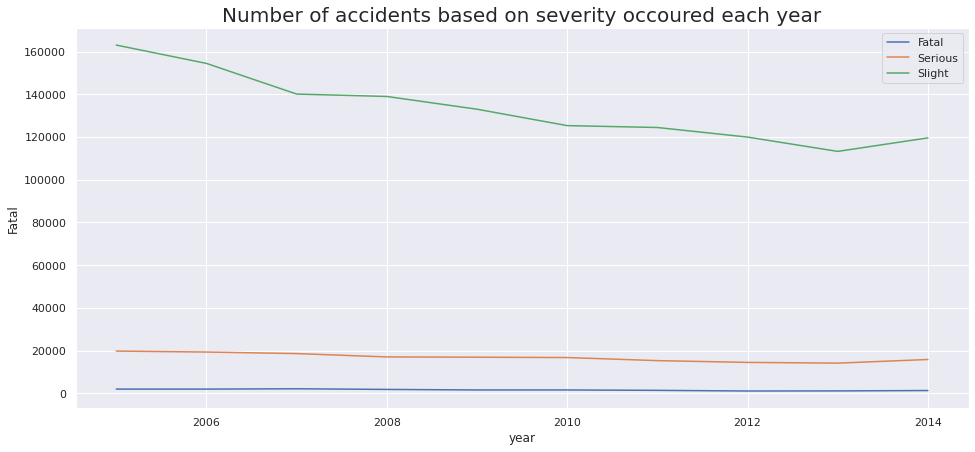

In [88]:
plt.figure(figsize = (16, 7))
sns.set(style='darkgrid')
year_plot = sns.lineplot(x='year', y='Fatal', data=conditions,label = "Fatal");
year_plot = sns.lineplot(x='year', y='Serious', data=conditions, label = "Serious");
year_plot = sns.lineplot(x='year', y='Slight', data=conditions, label = "Slight");
plt.title('Number of accidents based on severity occoured each year', fontsize = 20)
plt.show()

**Insights:**

It can be observed that the number of accidents has decreased over time for each severity. Accidents with slight severity are more frequent and have decreased the most.

### **Q5: What were the most common conditons which led to the accidents?**

- Most of the accidents happened while people were commuting for and from work which would cause rush on the way and would be a major cause of the accidents

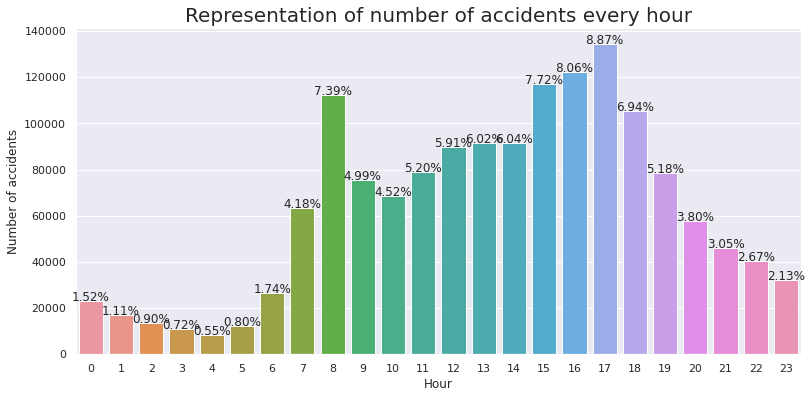

In [89]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
hour_plot = sns.countplot(x = 'hour', data = accidents_time)
hour_plot.set(xlabel = 'Hour', ylabel = 'Number of accidents')
for p in hour_plot.patches:
    height = p.get_height() 
    hour_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(accidents_time))*100)+'%',  
      ha="center")
plt.title("Representation of number of accidents every hour", fontsize = 20)
plt.show()

Another cause would be road conditions or the weather conditions or the light conditions.

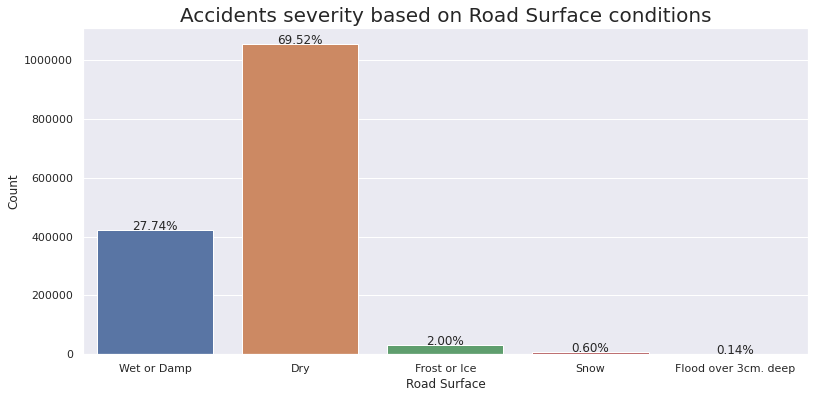

In [90]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
road_plot = sns.countplot(x = 'Road_Surface_Conditions', data = conditions_df)
road_plot.set(xlabel = 'Road Surface', ylabel = 'Count')
plt.ticklabel_format(style='plain', axis='y')
for p in road_plot.patches:
    height = p.get_height() 
    road_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(conditions_df))*100)+'%',  
      ha="center")
plt.title('Accidents severity based on Road Surface conditions', fontsize = 20)
plt.show()

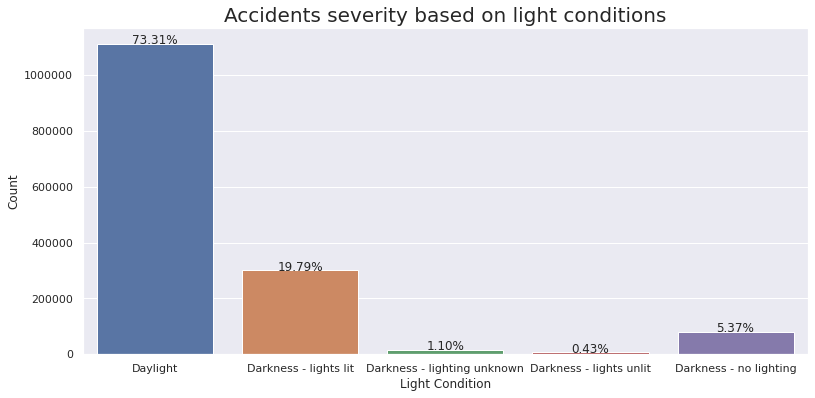

In [91]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
road_plot = sns.countplot(x = 'Light_Conditions', data = conditions_df)
road_plot.set(xlabel = 'Light Condition', ylabel = 'Count')
plt.ticklabel_format(style='plain', axis='y')
for p in road_plot.patches:
    height = p.get_height() 
    road_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(conditions_df))*100)+'%',  
      ha="center")
plt.title('Accidents severity based on light conditions', fontsize = 20)
plt.show()

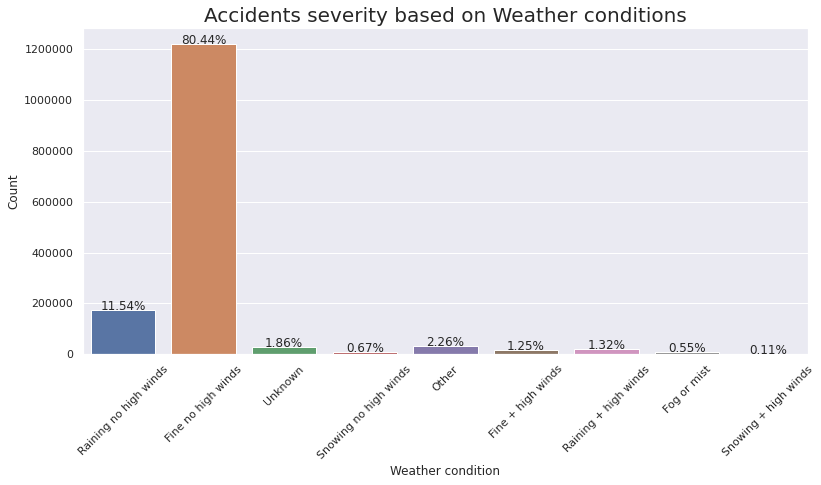

In [92]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
road_plot = sns.countplot(x = 'Weather_Conditions', data = conditions_df)
road_plot.set(xlabel = 'Weather condition', ylabel = 'Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
for p in road_plot.patches:
    height = p.get_height() 
    road_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(conditions_df))*100)+'%',  
      ha="center")
plt.title('Accidents severity based on Weather conditions', fontsize = 20)
plt.show()

Surprisingly enough 70% of accidents happened when the roads were dry, 73% happened in daylight and 80% happened with the weather fine and no high wing which further goes to say that the cause of most of the accidents was the rush beacuse of people commuting to and from the work.

### **Q6: Which maneouvres are more dangerous, or during which maneouvres are you more likely to be involved in a collision?**

In [93]:
manoeuvre_df = pd.DataFrame(vehicle_df[vehicle_df.Vehicle_Manoeuvre != 'Going ahead other'].Vehicle_Manoeuvre.value_counts().reset_index())
manoeuvre_df.rename(columns={'index': 'Vehicle_Manoeuvre', 'Vehicle_Manoeuvre': 'Number_of_accidents'}, inplace=True)
manoeuvre_df

,Vehicle_Manoeuvre,Number_of_accidents
0,Turning right,153687
1,Slowing or stopping,132007
2,Waiting to go - held up,107339
3,Moving off,67812
4,Going ahead right-hand bend,66405
5,Going ahead left-hand bend,56917
6,Parked,53724
7,Turning left,51943
8,Overtaking moving vehicle - offside,32144
9,Waiting to turn right,25535


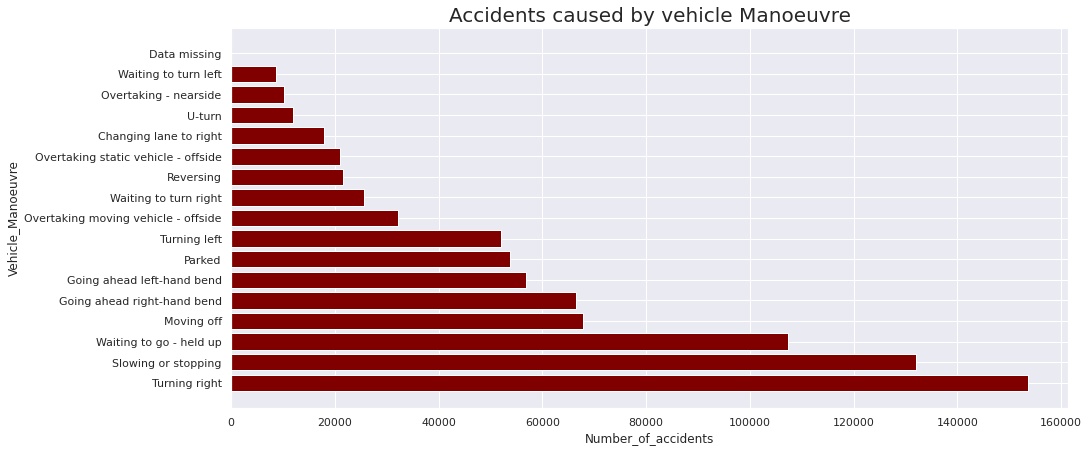

In [94]:
plt.figure(figsize = (15, 7))
manouevre_plot = plt.barh(manoeuvre_df.Vehicle_Manoeuvre, manoeuvre_df['Number_of_accidents'], color ='maroon')
plt.xlabel('Number_of_accidents')
plt.ylabel('Vehicle_Manoeuvre')
plt.title('Accidents caused by vehicle Manoeuvre', fontsize = 20)
plt.show();

So, turning right causes more collisions than any other manoeuvre. Slowing/stopping and waiting to go also make sense - having to brake suddenly or being hit from behind but Surprisingly, we can see that reversing is at the bottom

### **Q7: Which district has the highest number of accidents over the year?**

Birmingham is the district with most number of accidents.

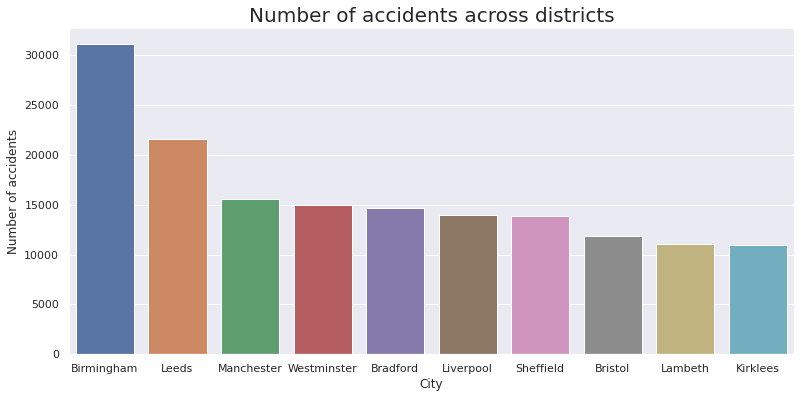

In [95]:
plt.figure(figsize = (13, 6))
sns.set(style='darkgrid')
november_plot = sns.barplot(x = 'city', y = 'accidents', data = district_top_10)
november_plot.set(xlabel = 'City', ylabel = 'Number of accidents')
plt.title("Number of accidents across districts", fontsize = 20)
plt.show()

### **Q8: What other conditions contribute to the accidents?**

We can see the accidents caused by some sepcial road conditions like traffic, oils or mud on road, roadworks and others.

In [96]:
special_conditions_df = pd.DataFrame(accidents_df.Special_Conditions_at_Site.value_counts()).reset_index()

special_conditions_df = special_conditions_df.rename(columns={'index': 'conditions', 'Special_Conditions_at_Site': 'counts'})
special_conditions_df

,conditions,counts
0,0,1480891
1,4,17638
2,6,5082
3,7,4774
4,5,3605
5,1,2727
6,3,2264
7,2,754
8,-1,3


Removing the row with '0' in the conditions which represents 'None' or no special conditons

In [97]:
special_conditions_df = special_conditions_df.drop(0)

In [98]:
def get_conditions(code):
  if code == 1:
    return 'Auto traffic signal - out'
  elif code == 2:
    return 'Auto signal part defective'
  elif code == 3:
    return 'Road sign or marking defective or obscured'
  elif code == 4:
    return 'Roadworks'
  elif code == 5:
    return 'Road surface defective'
  elif code == 6:
    return 'Oils or Disels'
  elif code == 7:
    return 'Muds'
  elif code == -1:
    return 'Data Missing'

In [99]:
special_conditions_df['conditions'] = special_conditions_df['conditions'].apply(get_conditions)
special_conditions_df

,conditions,counts
1,Roadworks,17638
2,Oils or Disels,5082
3,Muds,4774
4,Road surface defective,3605
5,Auto traffic signal - out,2727
6,Road sign or marking defective or obscured,2264
7,Auto signal part defective,754
8,Data Missing,3


In [100]:
special_conditions_plot = px.pie(special_conditions_df, values='counts', names='conditions', hole = 0.3,
                           title='Special conditions for accidents', color_discrete_sequence=px.colors.qualitative.D3,
                           width = 900, height = 600)
special_conditions_plot.show()


We can see that after excluding the accidents which do not happen because of any special conditions the "Roadworks" cause around 50% of the accidents.

# Summary

We analysed the UK accidents dataset from 2005 to 2014 using Python, Pandas, Matplotlib and Seaborn. Here is a summary of the key insights for we've found:

**Accidents**

- There was a decrease in accidents every year in the decade 2004-2014 except for the last year which get's a spike in number of accidents.
- Friday is the day of the week in where more accidents tend to happen.
- The most common hours of the day in where accidents occur are at 8-9 and 16-17. These are mainly the peak hours to commute to work.
- There is a sudden decrease in accidents in the month of january to april in the year 2013 because A snowy spell of weather affected most of the UK in January 2013.
- January 2010 was provisionally the coldest January since 1987 in the UK which explains the sudden decrease in the accidents.
- We see that the month of november in 2005 the most number of accidents happened.

**Casulaties**

- Almost 60% of the casualties are men.
- More than one third of the casualties are in the age band 25-45.
- Just the 1% of the casualties end with fatal injuries.
- The accidents in daylight are more than the accidents that happened in darkness and also the accidents that happened in the darkness with the lights on are more
- Almost 70% accidents happens with the roads dry and almost one third of the accidents happens with the road surface wet.
- More that 60% of the accidents that happened, involved a car occupant as a casualty.

**Vehicles**

- The first point of impact is the front in the 50% of the vehicles implicated on accidents.
- Almost 70% of the accidents happens while people commuting to/from the work which also explains the most number of accidents at the peak hours of commute.
-Almost 65% of the accidents happens when the mode of travel is car.

# Future Work

**Exploratory data analysis**
- Performing analysis with the loactions of accidents with different variables.
- Perofrming all the analysis on each year.
- Explore per-capita accident figures by adding a state and city-wise population data set.

**Programming enhancements**

- Improve code modularity with functions to process multiple datasets
- Improve execution speed with better choice of Pandas functions
- Functions for visualisation customisations

# References

- **Jovian tutorials**
  - [Analyzing Tabular Data with Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis)
  - [Data Visualization using Python, Matplotlib and Seaborn](https://jovian.ai/aakashns/python-matplotlib-data-visualization)
  - [Advanced Data Analysis Techniques with Python & Pandas](https://jovian.ai/aakashns/advanced-data-analysis-pandas)
  - [Exploratory Data Analysis Case Study - Stack Overflow Developer Survey](https://jovian.ai/aakashns/stackoverflow-survey-exploratory-data-analysis)
  -  [Interactive Visualization with Plotly](https://jovian.ai/aakashns/interactive-visualization-plotly)
- [Stackoverflow](https://stackoverflow.com/) hacks, links throughout the notebook
- [Geeks for Geeks](https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/#:~:text=Heatmap%20is%20defined%20as%20a,values%2C%20darker%20colors%20are%20preferred)

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>